# Object Pointing and Counting


In this example, you will learn how to perform object pointing and counting using the MLX-VLM (Vision Language Model) library. 

We will use `Molmo-7B-D-0924`, for pointing and counting objects in images.

## Installation


In [ ]:
pip install -U mlx-vlm

## Import Dependencies

In [1]:
from mlx_vlm import load, apply_chat_template, generate
from mlx_vlm.utils import load_image
from utils import parse_points, plot_locations


## Molmo-7B-D-0924

In [2]:
# Load model and processor
model, processor = load("mlx-community/Molmo-7B-D-0924-4bit")
config = model.config

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

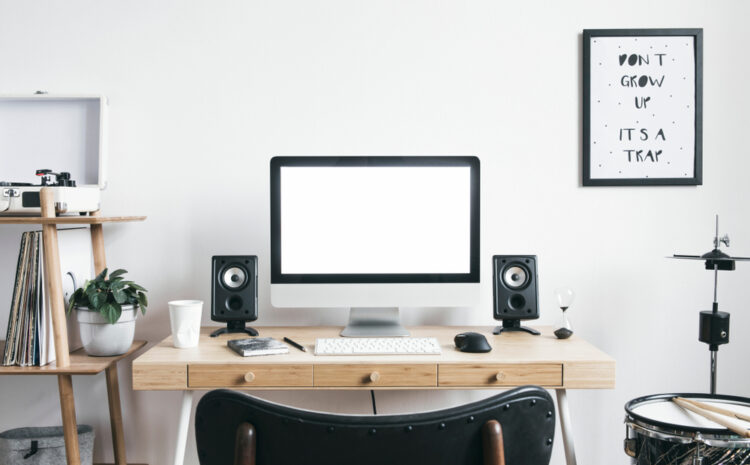

In [3]:
# Load image
image = "images/desktop_setup.png"
image = load_image(image)
image

## Point to all objects

In [4]:
messages = [
    {"role": "user", "content": "Point out to all speakers"}
]
prompt = apply_chat_template(processor, config, messages)

In [5]:
output = generate(
    model,
    processor,
    image,
    prompt,
    max_tokens=1000,
    temperature=0.7,
)

In [6]:
print(output)

 <points x1="32.0" y1="62.8" x2="68.5" y2="62.8" alt="speakers">speakers</points>


### Count objects

In [7]:
x, y, item_labels = parse_points(output)

# Count objects
print(f"Number of objects: {len(x)}")

Number of objects: 2


### Plot locations

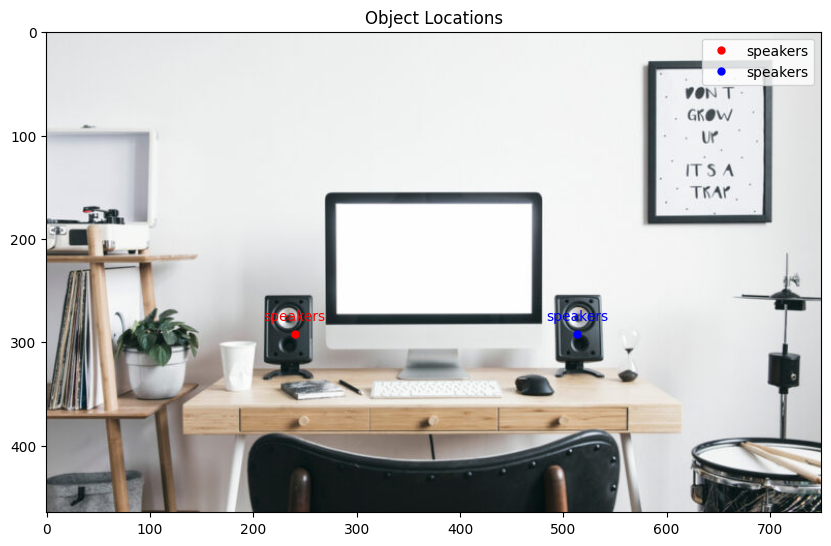

In [8]:
plot_locations(output, image)

## Point to specific objects

In [9]:
messages = [
    {"role": "user", "content": "Point out to speaker, keyboard, monitor, mouse"}
]
prompt = apply_chat_template(processor, config, messages)

In [10]:
output = generate(
    model,
    processor,
    image,
    prompt,
    max_tokens=1000,
    temperature=0.7,
)

In [13]:
print(output)

 <points x1="32.0" y1="62.8" x2="49.0" y2="75.0" x3="50.8" y3="49.0" x4="63.2" y4="73.8" alt="speaker, keyboard, monitor, mouse">speaker, keyboard, monitor, mouse</points>


### Counting objects

In [11]:
x, y, item_labels = parse_points(output)

# Count objects
print(f"Number of objects: {len(x)}")

Number of objects: 4


### Plot locations

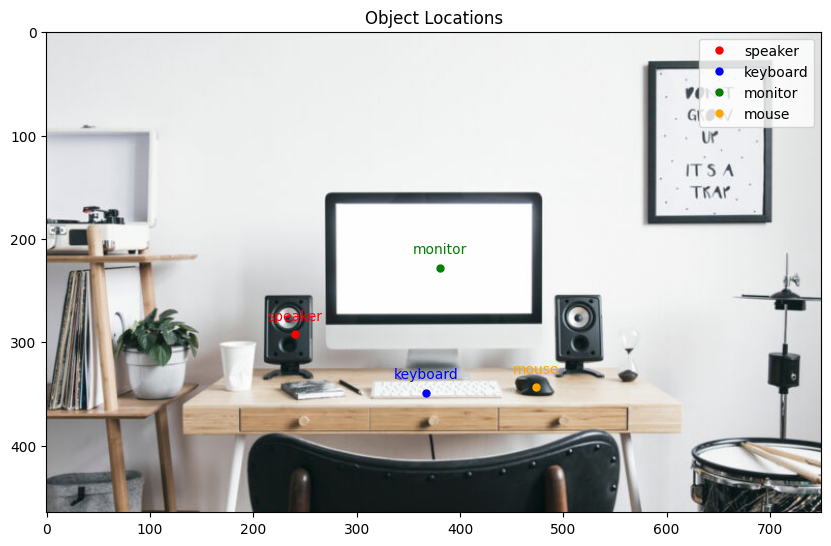

In [12]:
plot_locations(output, image)